In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
# Read the data
df = pd.read_csv('pendulo-pohl.csv', delimiter=';')

In [5]:
# First experiment
experiment_1 = {
    't': df['T1'],
    'x': df['S1'],
}
# Second experiment
experiment_2 = {
    't': df['T2'],
    'x': df['S2'],
}
# Third experiment
experiment_3 = {
    't': df['T3'],
    'x': df['S3'],
}
# Fourth experiment
experiment_4 = {
    't': df['T4'],
    'x': df['S4'],
}

# plt.plot(experiment_4['t'], experiment_4['x'])
# plt.xlabel('Tiempo (s)')
# plt.ylabel('Posición (m)')
# plt.title('Experimento 4')
# plt.show()

mean period:  1.2664285714285717


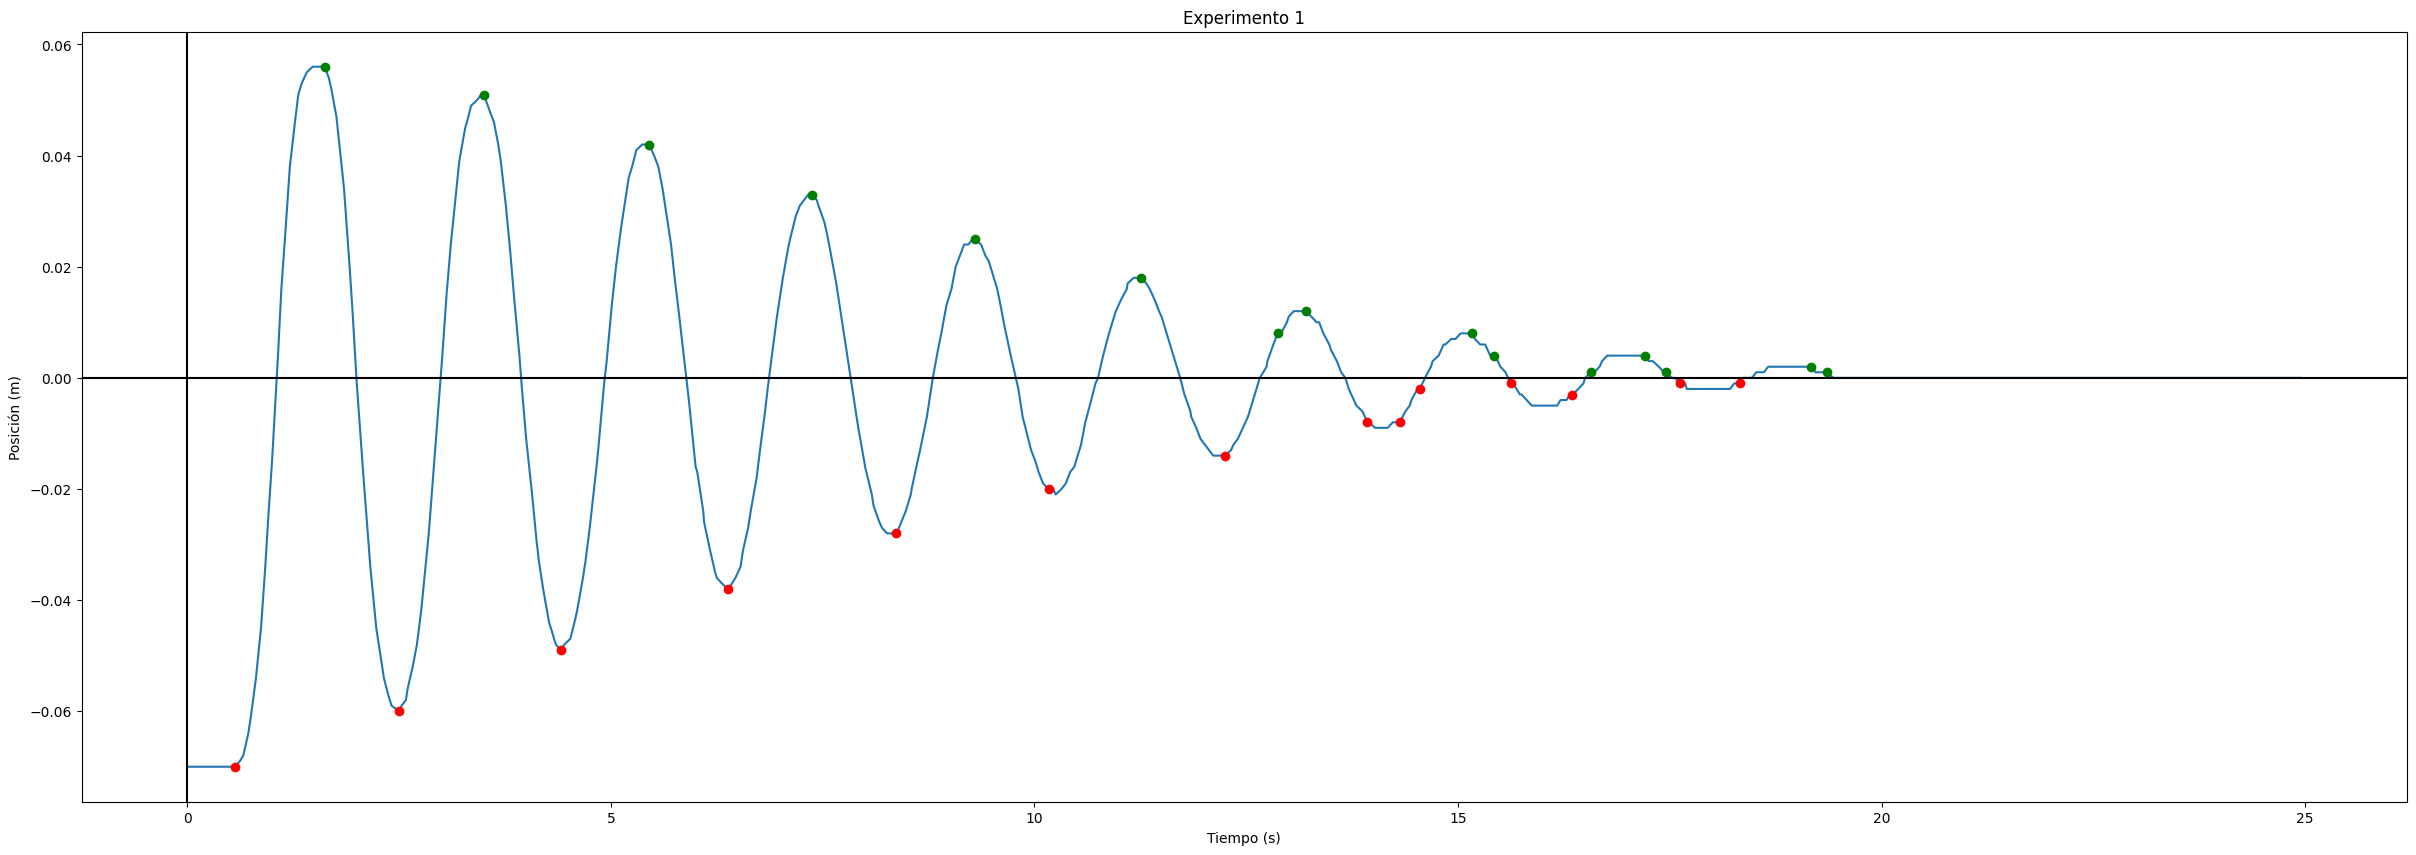

In [22]:
# Find maximus values
def find_max_values(e):
    max_values = []
    for i in range(1, len(e['x']) - 1):
        if e['x'][i] >= e['x'][i - 1] and e['x'][i] >= e['x'][i + 1] and e['x'][i] > 0:
            max_values.append(i)

    i = 0
    while i < len(max_values) - 1:
        if max_values[i + 1] - max_values[i] <= 3:
            val1 = e['x'][max_values[i]]
            val2 = e['x'][max_values[i + 1]]

            if val1 > val2:
                max_values.pop(i + 1)
            else:
                max_values.pop(i)
        else:
            i += 1

    return max_values


# Find minimus values
def find_min_values(e):
    min_values = []
    for i in range(1, len(e['x']) - 1):
        if e['x'][i] <= e['x'][i - 1] and e['x'][i] <= e['x'][i + 1] and e['x'][i] < 0:
            min_values.append(i)
    
    i = 0
    while i < len(min_values) - 1:
        if min_values[i + 1] - min_values[i] <= 3:
            val1 = e['x'][min_values[i]]
            val2 = e['x'][min_values[i + 1]]

            if val1 > val2:
                min_values.pop(i + 1)
            else:
                min_values.pop(i)
        else:
            i += 1
    
    return min_values



# Find the period
def find_period(experiment):
    max_values = find_max_values(experiment)
    period = []
    for i in range(1, len(max_values)):
        period.append(experiment['t'][max_values[i]] - experiment['t'][max_values[i - 1]])
    return period


max_values = find_max_values(experiment_4)
min_values = find_min_values(experiment_4)
period = find_period(experiment_4)

print('mean period: ', np.mean(period))

# print(max_values)
# print(min_values)

plt.plot(experiment_4['t'], experiment_4['x'])
plt.plot(experiment_4['t'][min_values], experiment_4['x'][min_values], 'ro')
plt.plot(experiment_4['t'][max_values], experiment_4['x'][max_values], 'go')
# Change figure size
plt.rcParams["figure.figsize"] = (30,10)
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.title('Experimento 1')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()
# Draw x and y axis

# plot the maximus and minimus values
# plt.plot(experiment_4['t'], experiment_4['x'])



LinregressResult(slope=-0.23742385550369705, intercept=-1.8867854735378207, rvalue=-0.928212343711821, pvalue=6.057016647350297e-07, stderr=0.026394148404800134, intercept_stderr=0.3565604254853823)


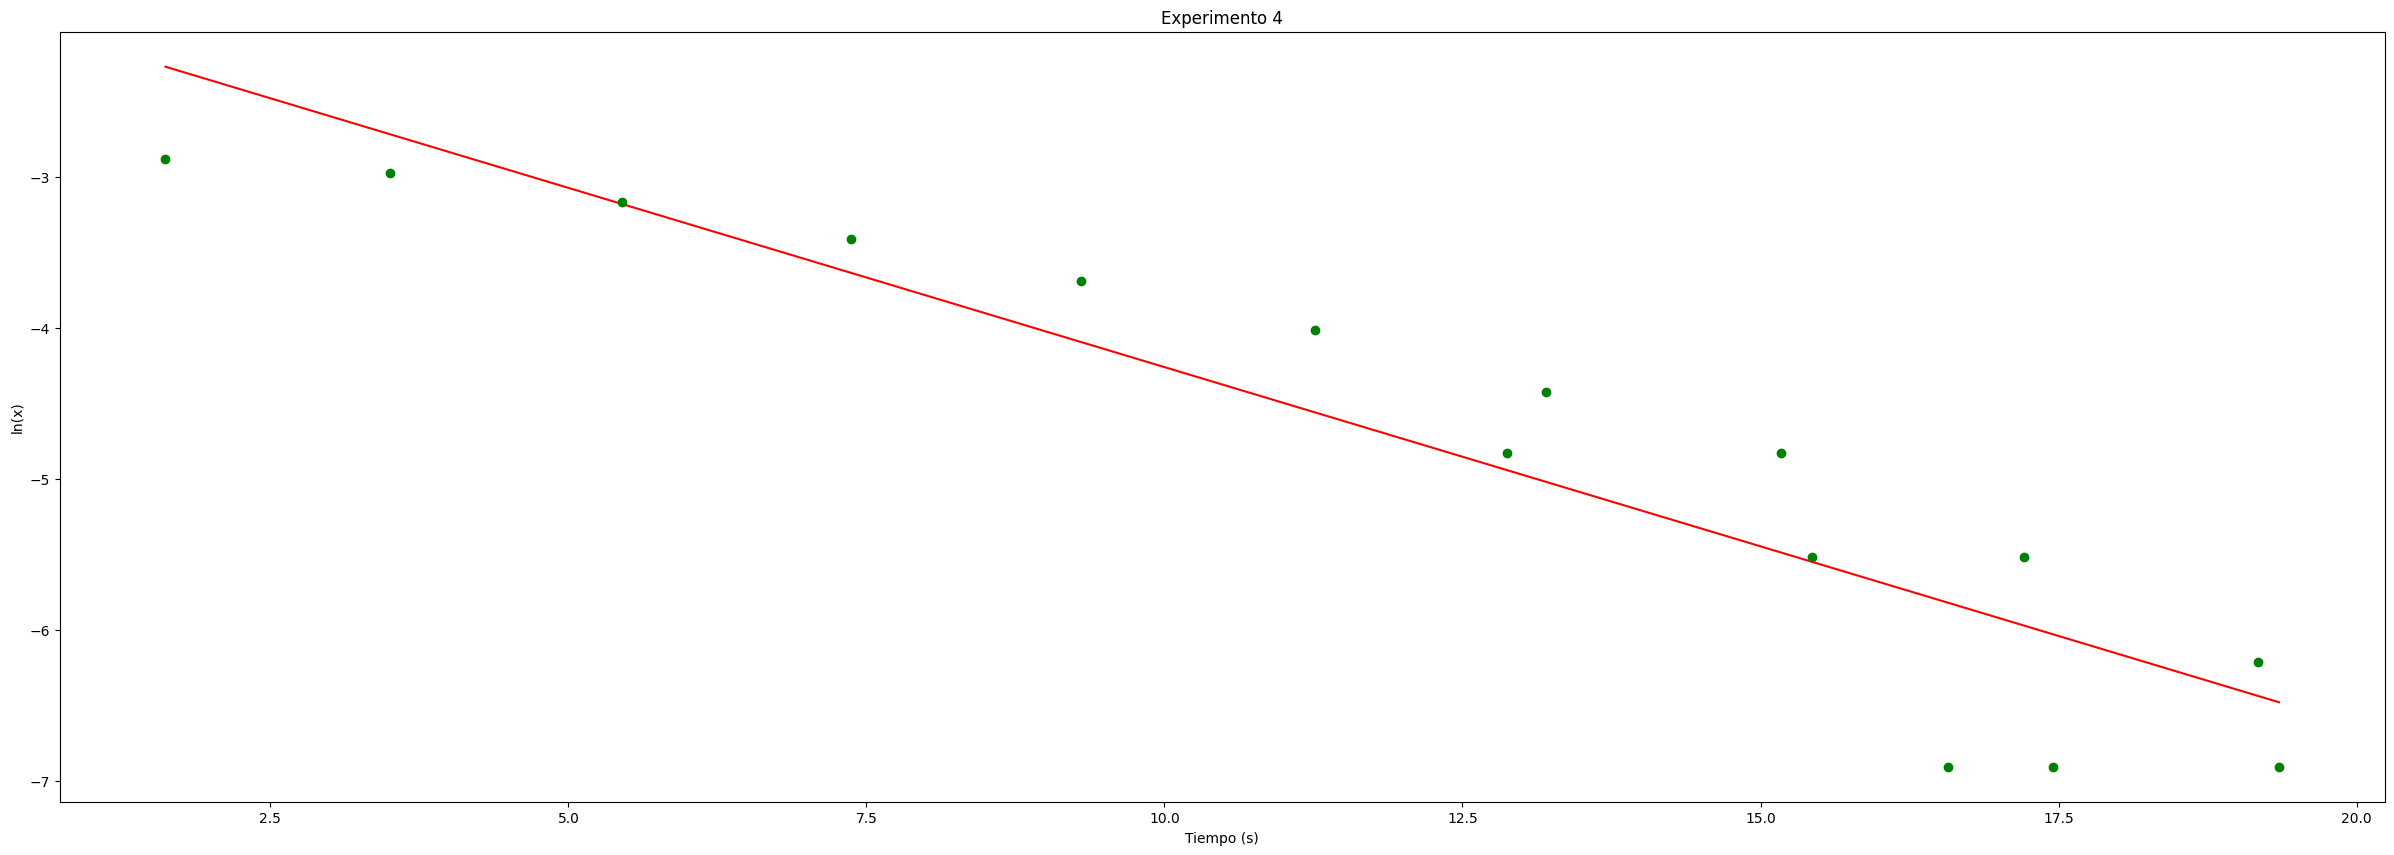

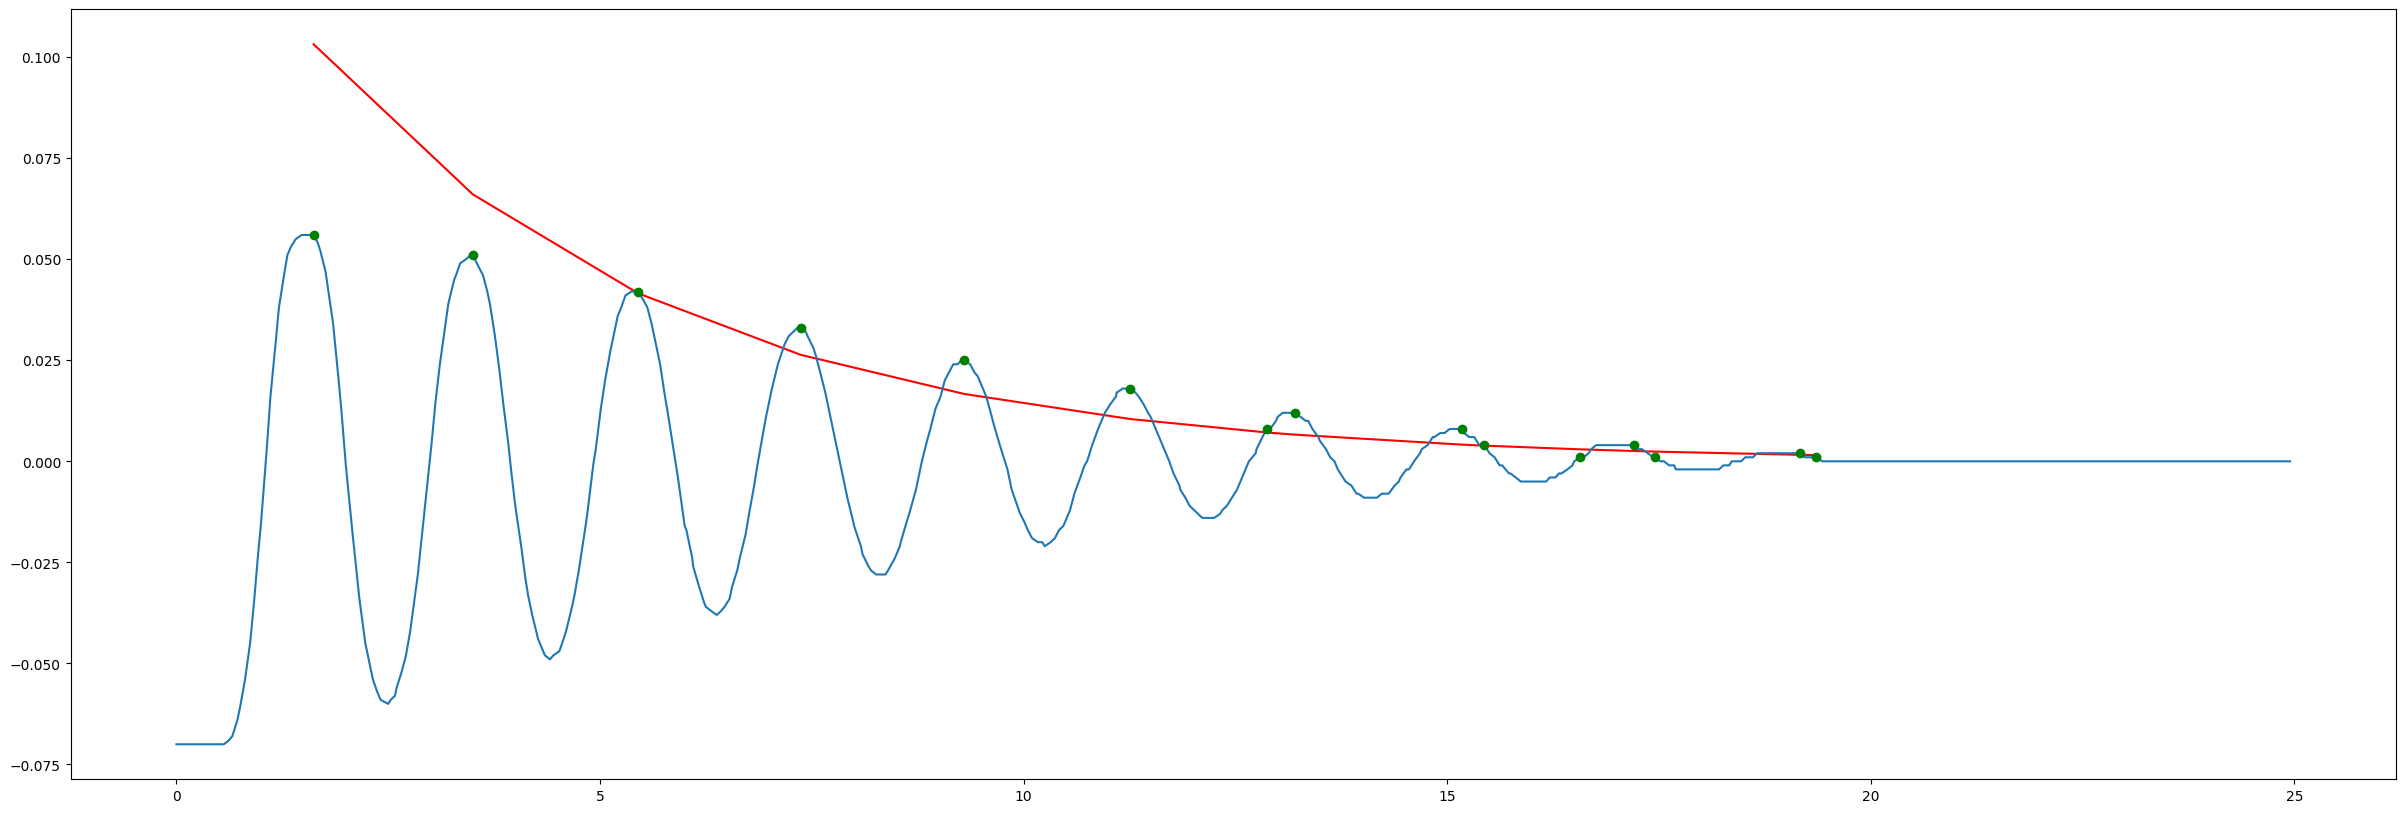

In [32]:
ln_max = np.log(experiment_4['x'][max_values])



regress = stats.linregress(experiment_4['t'][max_values], ln_max)
print(regress)

plt.plot(experiment_4['t'][max_values], regress.slope * experiment_4['t'][max_values] + regress.intercept, 'r')
plt.plot(experiment_4['t'][max_values], ln_max, 'go')
plt.xlabel('Tiempo (s)')
plt.ylabel('ln(x)')
plt.title('Experimento 4')
plt.show()

# convert regrees a exponential
c = np.exp(regress.intercept)
n = regress.slope

yfinal = c * np.exp(experiment_4['t'][max_values] * n)
plt.plot(experiment_4['t'][max_values], yfinal, 'r')
plt.plot(experiment_4['t'], experiment_4['x'])

plt.plot(experiment_4['t'][max_values], experiment_4['x'][max_values], 'go')

